In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import numpy.ma as ma

In [2]:
result = np.zeros((2160))
i=0

In [3]:
# 224:343 --------- 64S-69S
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SSS.nc')
        plotvar = data.variables['SALT'][0,:,:]
        plotvar = plotvar[0,247:365,700:1300]
        #plotvar = plotvar[0,224:343,600:1400]
        aveplot = plotvar.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        result[i] = aveplot
        
        i = i + 1

In [4]:
resultee = np.zeros((84))
i=0

In [5]:
# 330-336 --------- 64S-69S
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(330,337)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/user/xiliangdiao/figures/SALT_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.nc')
        plotvar = data.variables['SALT'][0,:,:]
        plotvar = plotvar[0,247:365,700:1300]
        #plotvar = plotvar[0,224:343,600:1400]
        aveplot = plotvar.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        resultee[i] = aveplot
        
        i = i + 1

In [6]:
result2 = np.zeros((1944))
i=0

In [7]:
# 224:343 --------- 64S-69S
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(338,500)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn330-500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SSS2.nc')
        plotvar = data.variables['SALT'][0,:,:]
        plotvar = plotvar[0,247:365,700:1300]
        #plotvar = plotvar[0,224:343,600:1400]
        aveplot = plotvar.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        result2[i] = aveplot
        
        i = i + 1

In [8]:
two = result2[0:12]

In [9]:
d1 = np.hstack((result,resultee))
d2 = np.hstack((d1,two))
d3 = np.hstack((d2,result2))

In [10]:
#np.savetxt('SSS-WSP.out',d3)

In [11]:
ww = np.convolve(d3, np.ones((60,))/60, mode='valid')

In [12]:
nn = np.nanmean(ww)

In [13]:
d4 = d3.reshape(350,12)

In [14]:
dmean = np.nanmean(d4,axis=1)

In [15]:
d3[:12]

array([33.83064361, 33.79893157, 33.91174316, 34.03256957, 34.18910929,
       34.31169118, 34.37488544, 34.40949146, 34.43951528, 34.44586823,
       34.40839273, 34.14896551])

Text(0.5, 1.0, 'SSS averaged in {50$^\\circ$S - 35$^\\circ$S, 50$^\\circ$W - 0$^\\circ$}  (5 year running mean)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


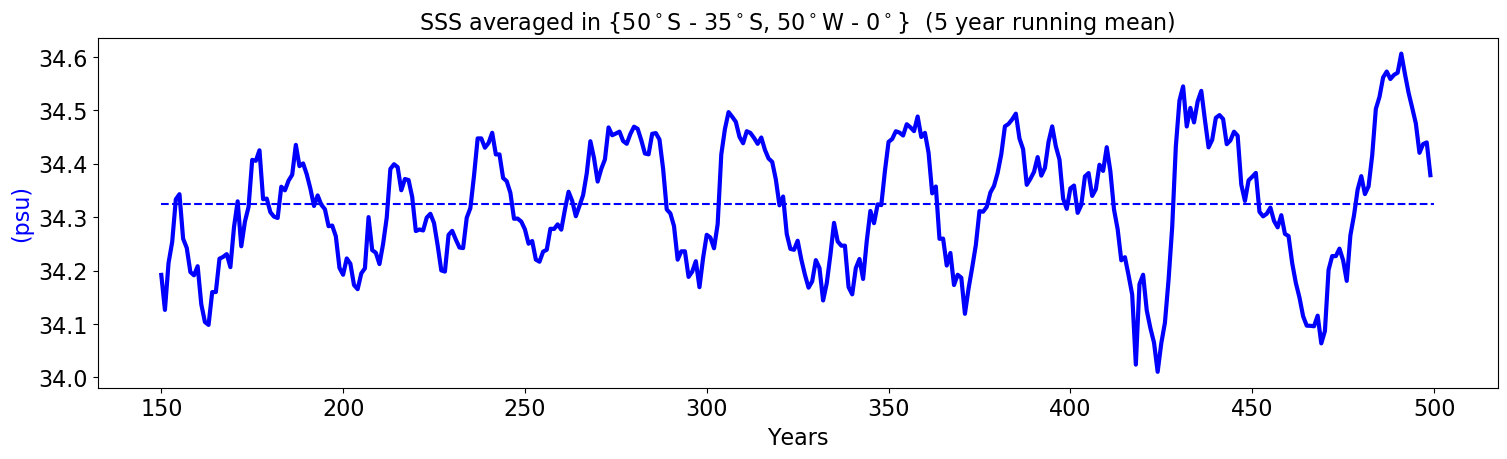

In [16]:
t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(dmean,'b',linewidth=3)
plt.hlines(nn, 0, 350, colors = "b",linestyles = "dashed")
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,351,50), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(psu)',color= 'b',**my_font)
plt.axis("tight")
#ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax0.set_title('SSS averaged in {50$^\circ$S - 35$^\circ$S, 50$^\circ$W - 0$^\circ$}  (5 year running mean)',**my_font)

In [17]:
#dmean = np.loadtxt("dmeanSSS.out")

In [18]:
#nn = np.nanmean(dmean)

In [19]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(123,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(233,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(117,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

ValueError: cannot reshape array of size 1272 into shape (123,12)

In [ ]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

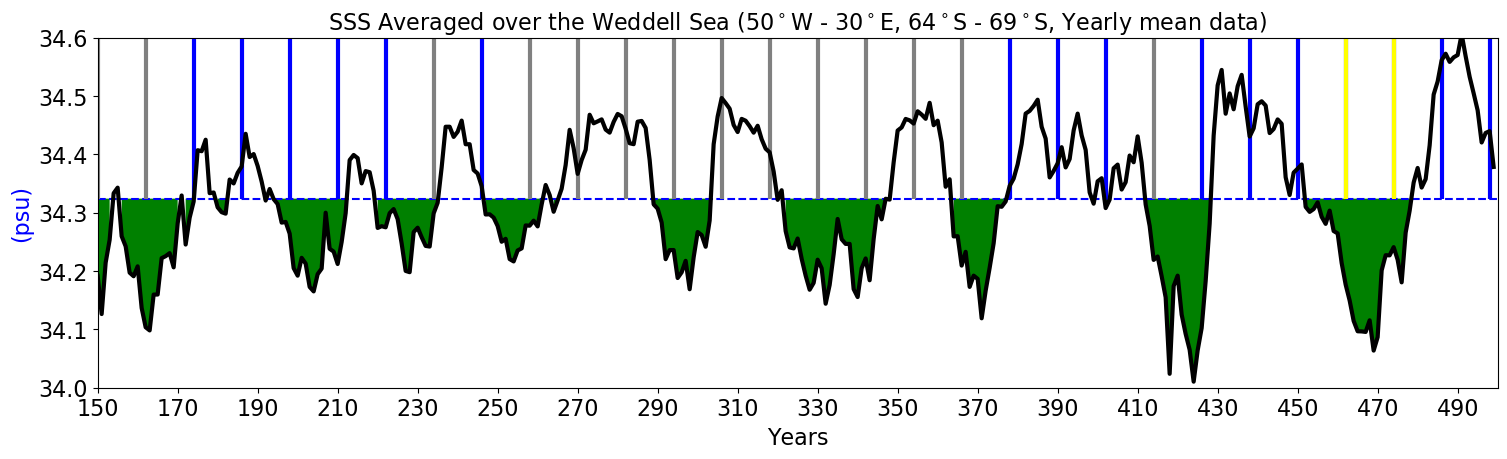

In [20]:
t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(dmean,'black',linewidth=3)
plt.hlines(nn, 0, 350, colors = "b",linestyles = "dashed")
ax0.fill_between(t,nn,dmean,where=dmean < nn,facecolor='green', alpha=1)


plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.yticks(**my_font)

plt.vlines(noxx, nn, 34.6, colors = "grey",linewidth=3)
plt.vlines(mrpxx, nn, 34.6, colors = "blue",linewidth=3)
plt.vlines(wspxx, nn, 34.6, colors = "yellow",linewidth=3)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(psu)',color= 'b',**my_font)
plt.axis("tight")
ax0.set(ylim=(34, 34.6),xlim=(0, 350))  
#ax0.set_title('SSS Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)
ax0.set_title('SSS Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, Yearly mean data)',**my_font)
plt.savefig("SSS-WSP22222.png",bbox_inches='tight',dpi=fig.dpi)

In [21]:
np.savetxt('dmeanSSSnew.out', dmean)